In [71]:
import archetypes as arch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [72]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/econometrics.csv", index_col=0)
std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled

,Gross domestic product (GDP) current prices,GDP per capita,Real change of GDP on previous year,Share of global economic output,Inflation rate,General government balance,General government gross debt (2006),General government gross debt
Argentina,-0.627681,-0.807410,-1.704073,-0.716060,3.060896,-0.500264,0.090112,-0.410369
Australia,-0.488701,1.073906,0.283667,-0.659603,-0.551014,0.351834,-1.205578,-0.617226
Brazil,-0.383589,-1.120724,-2.242419,-0.358500,1.399945,-1.379850,0.282066,0.137195
Canada,-0.436145,0.913370,-0.171857,-0.584328,-0.524650,0.571731,0.396705,0.421117
China,1.449829,-1.110487,2.022939,2.501976,-0.366464,0.076964,-0.795010,-0.513797
European Union,2.460067,0.449105,0.076611,2.294968,-0.841021,0.599218,0.122104,0.289296
France,-0.254341,0.644526,-0.254679,-0.414957,-0.814657,0.186912,0.244741,0.508322
Germany,-0.058911,1.022524,-0.006212,-0.226768,-0.788293,1.313881,0.300728,-0.079802
India,-0.294633,-1.683189,2.064350,0.507170,0.398101,-0.720161,0.583327,-0.041270
Indonesia,-0.552351,-1.350379,1.318948,-0.377319,0.029001,0.406808,-0.517743,-0.884924


In [140]:
model = arch.BiAA(n_archetypes=(4, 4), n_init=10, max_iter=100_000, random_state=0)

In [141]:
_ = model.fit(df_scaled)

In [142]:
model.archetypes_

array([[-0.60551337, -0.37855775, -0.86991031,  0.98514635],
       [ 3.06089624, -1.0074685 ,  0.05567524, -0.80741024],
       [-0.92011437, -0.11347593,  3.43848652,  0.57677749],
       [-0.21631224,  2.08687509, -0.51721126, -1.22295862]])

In [143]:
alphas = pd.DataFrame(model.alphas_, index=df.index)

a = alphas.idxmax(axis=1)

alphas_names = []
alphas_lines = [0]
for i in range(model.n_archetypes[0]):
    a_i = alphas[a == i].sort_values(i, ascending=False).index.to_list()
    alphas_names += a_i
    alphas_lines += [len(alphas_names)]

In [144]:
gammas = pd.DataFrame(model.gammas_.T, index=df.columns)

g = gammas.idxmax(axis=1)

gammas_names = []
gammas_lines = [0]
for i in range(model.n_archetypes[1]):
    g_i = gammas[g == i].sort_values(i, ascending=False).index.to_list()
    gammas_names += g_i
    gammas_lines += [len(gammas_names)]

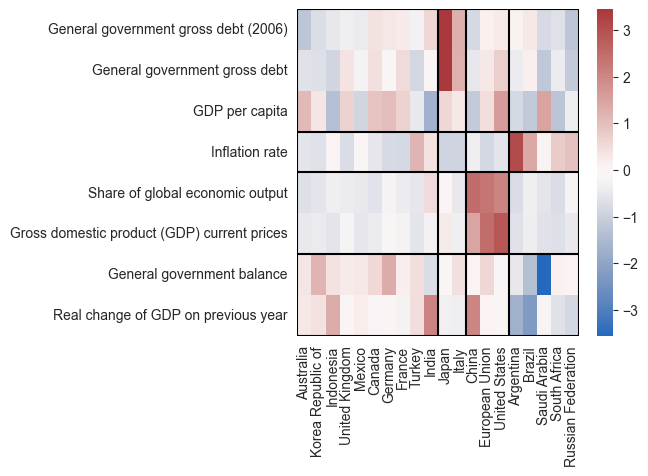

In [169]:
df_sort = df_scaled.loc[alphas_names, gammas_names]
g = sns.heatmap(df_sort.T, cmap="vlag")

for i in alphas_lines:
    _ = g.axvline(i, color="black")

for i in gammas_lines:
    _ = g.axhline(i, color="black")

plt.subplots_adjust(left=0.45, right=1, bottom=0.3, top=0.98)

plt.savefig('results/eco.eps', format='eps')

plt.show()

/Users/aleix11alcacer/miniconda3/envs/biaa/lib/python3.9/site-packages/archetypes/visualization/simplex.py:96: RuntimeWarning: invalid value encountered in divide
  projections /= np.linalg.norm(projections, axis=1)[:, None]


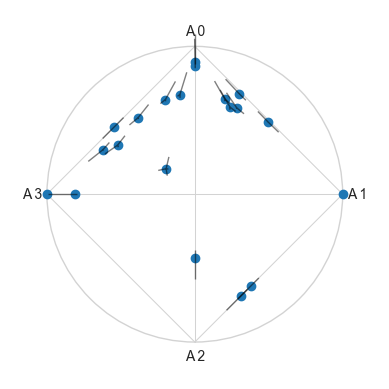

In [147]:
arch.simplex(alphas.to_numpy(), alpha=1, show_direction=True, direction_alpha=0.5, direction_color="black")
plt.show()